# Stacked LSTM Model for Predicting International Airline Passenger Numbers

# Statement : Predict future international airline passenger numbers using historical time-series data with a Stacked LSTM model.

In [2]:
# LSTM for international airline passengers problem with regression framing
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix

In [3]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

# fix random seed for reproducibility

In [ ]:
# LSTM for international airline passengers problem with regression framing
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

# fix random seed for reproducibility

In [ ]:
# fix random seed for reproducibility
tf.random.set_seed(7)

# load the dataset

In [ ]:
# load the dataset
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1


In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]


In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# when you want to ignore the warnings you hava to import warnings 

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

# create and fit the LSTM network


In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 3s - 28ms/step - loss: 0.0343
Epoch 2/100
94/94 - 0s - 2ms/step - loss: 0.0160
Epoch 3/100
94/94 - 0s - 2ms/step - loss: 0.0124
Epoch 4/100
94/94 - 0s - 2ms/step - loss: 0.0113
Epoch 5/100
94/94 - 0s - 2ms/step - loss: 0.0104
Epoch 6/100
94/94 - 0s - 2ms/step - loss: 0.0095
Epoch 7/100
94/94 - 0s - 2ms/step - loss: 0.0085
Epoch 8/100
94/94 - 0s - 3ms/step - loss: 0.0076
Epoch 9/100
94/94 - 0s - 2ms/step - loss: 0.0068
Epoch 10/100
94/94 - 0s - 2ms/step - loss: 0.0060
Epoch 11/100
94/94 - 0s - 2ms/step - loss: 0.0052
Epoch 12/100
94/94 - 0s - 2ms/step - loss: 0.0046
Epoch 13/100
94/94 - 0s - 2ms/step - loss: 0.0040
Epoch 14/100
94/94 - 0s - 2ms/step - loss: 0.0035
Epoch 15/100
94/94 - 0s - 2ms/step - loss: 0.0031
Epoch 16/100
94/94 - 0s - 2ms/step - loss: 0.0028
Epoch 17/100
94/94 - 0s - 2ms/step - loss: 0.0025
Epoch 18/100
94/94 - 0s - 2ms/step - loss: 0.0024
Epoch 19/100
94/94 - 0s - 4ms/step - loss: 0.0022
Epoch 20/100
94/94 - 0s - 2ms/step - loss: 0.0022
Epoch 21

# make predictions


In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


# invert predictions


In [ ]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error


In [ ]:
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.80 RMSE
Test Score: 49.36 RMSE


# shift train predictions for plotting


In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting


In [ ]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions


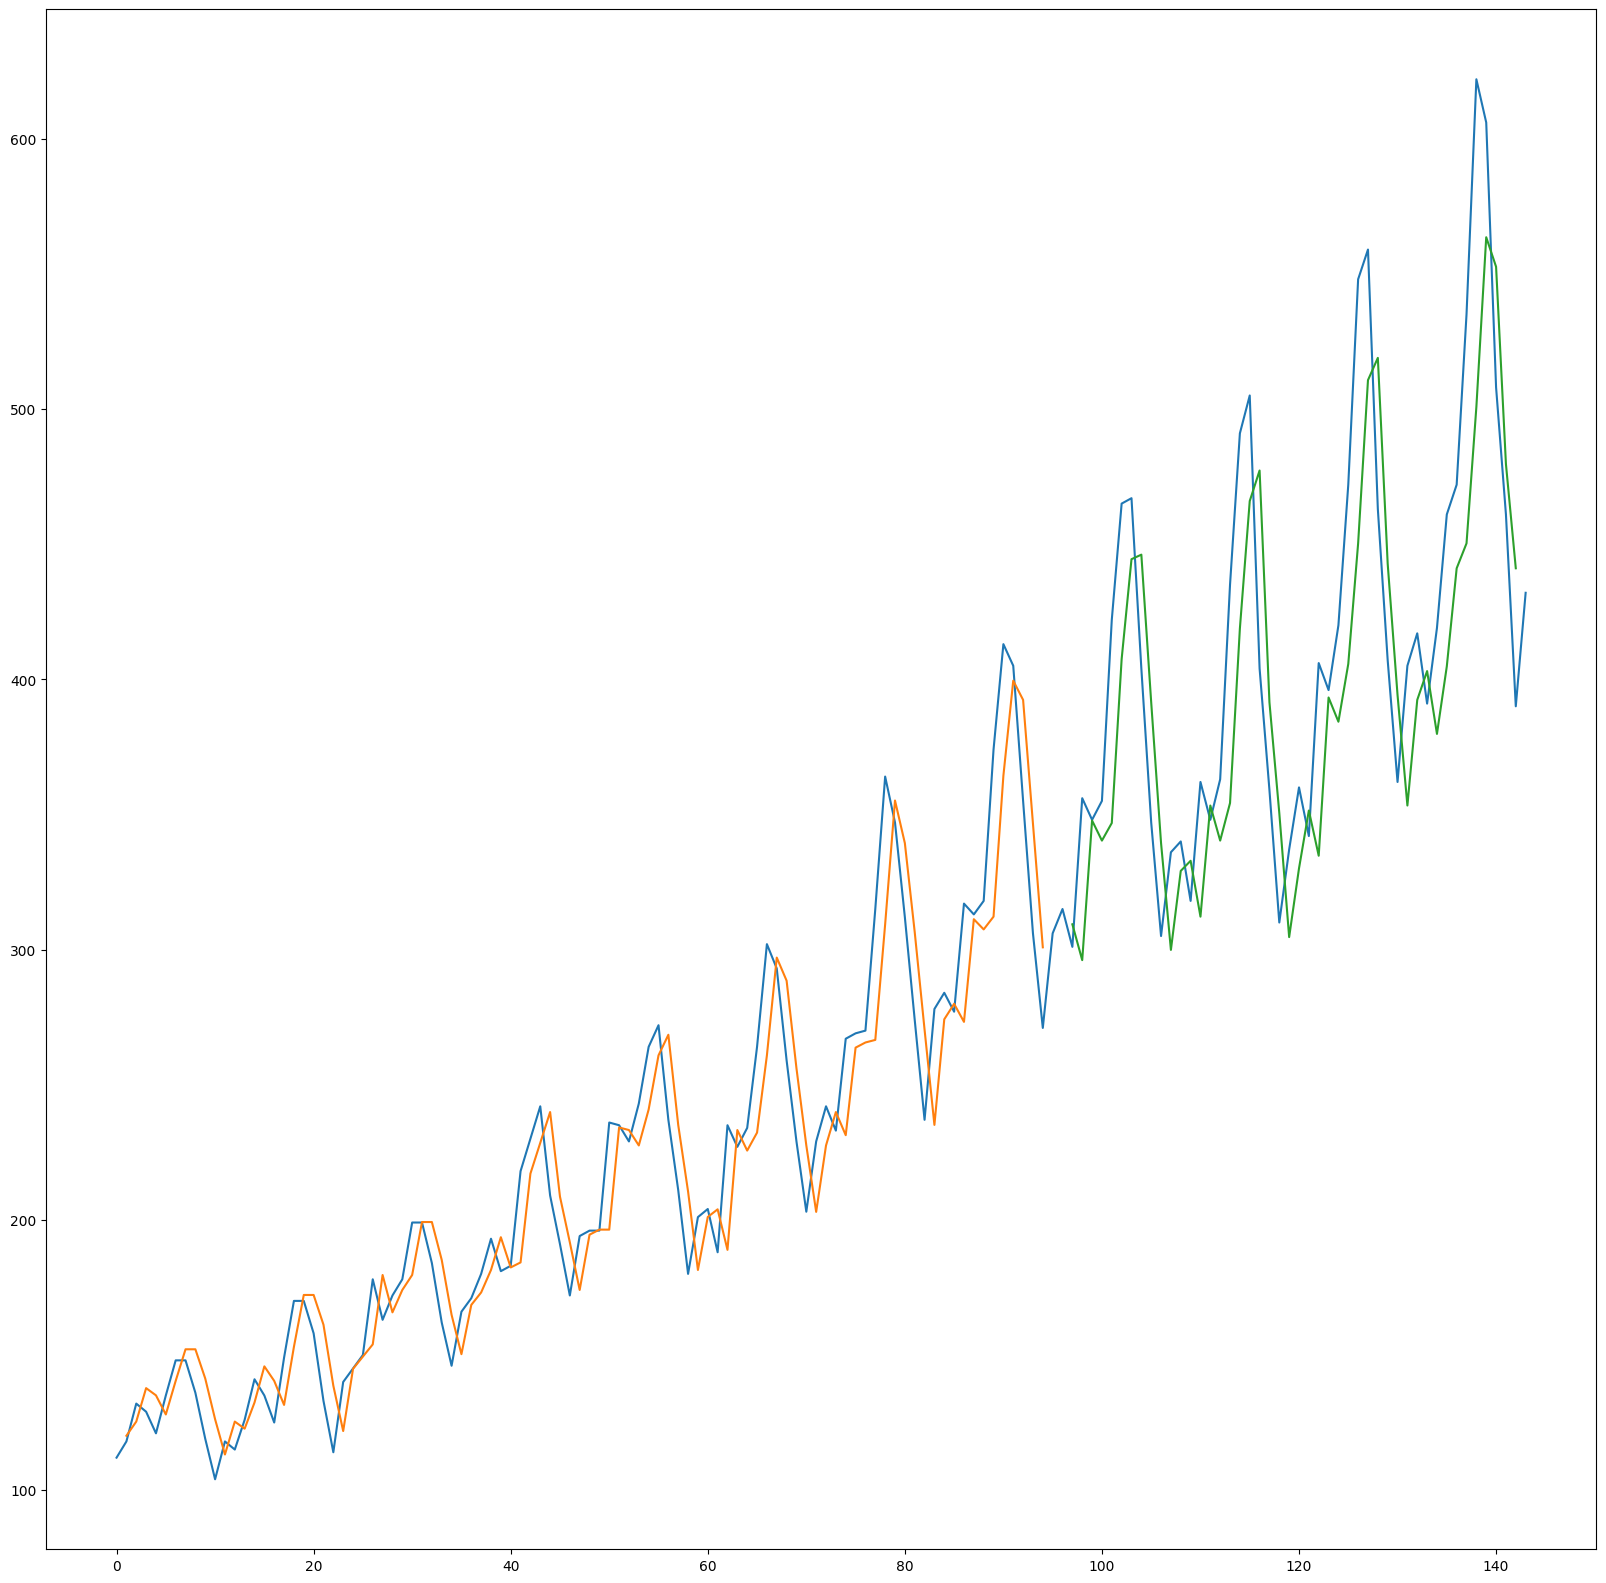

In [ ]:
# plot baseline and predictions
plt.figure(figsize=(20,20))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# fix random seed for reproducibility


In [4]:
# fix random seed for reproducibility
tf.random.set_seed(7)

# load the dataset


In [5]:
# load the dataset
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset


In [6]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets


In [7]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1


In [8]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]


In [9]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [12]:
import warnings 
warnings.filterwarnings('ignore')

# create and fit the LSTM network


In [13]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 3s - 28ms/step - loss: 0.0343
Epoch 2/100
94/94 - 0s - 2ms/step - loss: 0.0160
Epoch 3/100
94/94 - 0s - 2ms/step - loss: 0.0124
Epoch 4/100
94/94 - 0s - 2ms/step - loss: 0.0113
Epoch 5/100
94/94 - 0s - 2ms/step - loss: 0.0104
Epoch 6/100
94/94 - 0s - 2ms/step - loss: 0.0095
Epoch 7/100
94/94 - 0s - 2ms/step - loss: 0.0085
Epoch 8/100
94/94 - 0s - 3ms/step - loss: 0.0076
Epoch 9/100
94/94 - 0s - 2ms/step - loss: 0.0068
Epoch 10/100
94/94 - 0s - 2ms/step - loss: 0.0060
Epoch 11/100
94/94 - 0s - 2ms/step - loss: 0.0052
Epoch 12/100
94/94 - 0s - 2ms/step - loss: 0.0046
Epoch 13/100
94/94 - 0s - 2ms/step - loss: 0.0040
Epoch 14/100
94/94 - 0s - 2ms/step - loss: 0.0035
Epoch 15/100
94/94 - 0s - 2ms/step - loss: 0.0031
Epoch 16/100
94/94 - 0s - 2ms/step - loss: 0.0028
Epoch 17/100
94/94 - 0s - 2ms/step - loss: 0.0025
Epoch 18/100
94/94 - 0s - 2ms/step - loss: 0.0024
Epoch 19/100
94/94 - 0s - 4ms/step - loss: 0.0022
Epoch 20/100
94/94 - 0s - 2ms/step - loss: 0.0022
Epoch 21

# make predictions


In [14]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


# invert predictions


In [15]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error


In [16]:
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.80 RMSE
Test Score: 49.36 RMSE


# shift train predictions for plotting


In [17]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting


In [19]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions


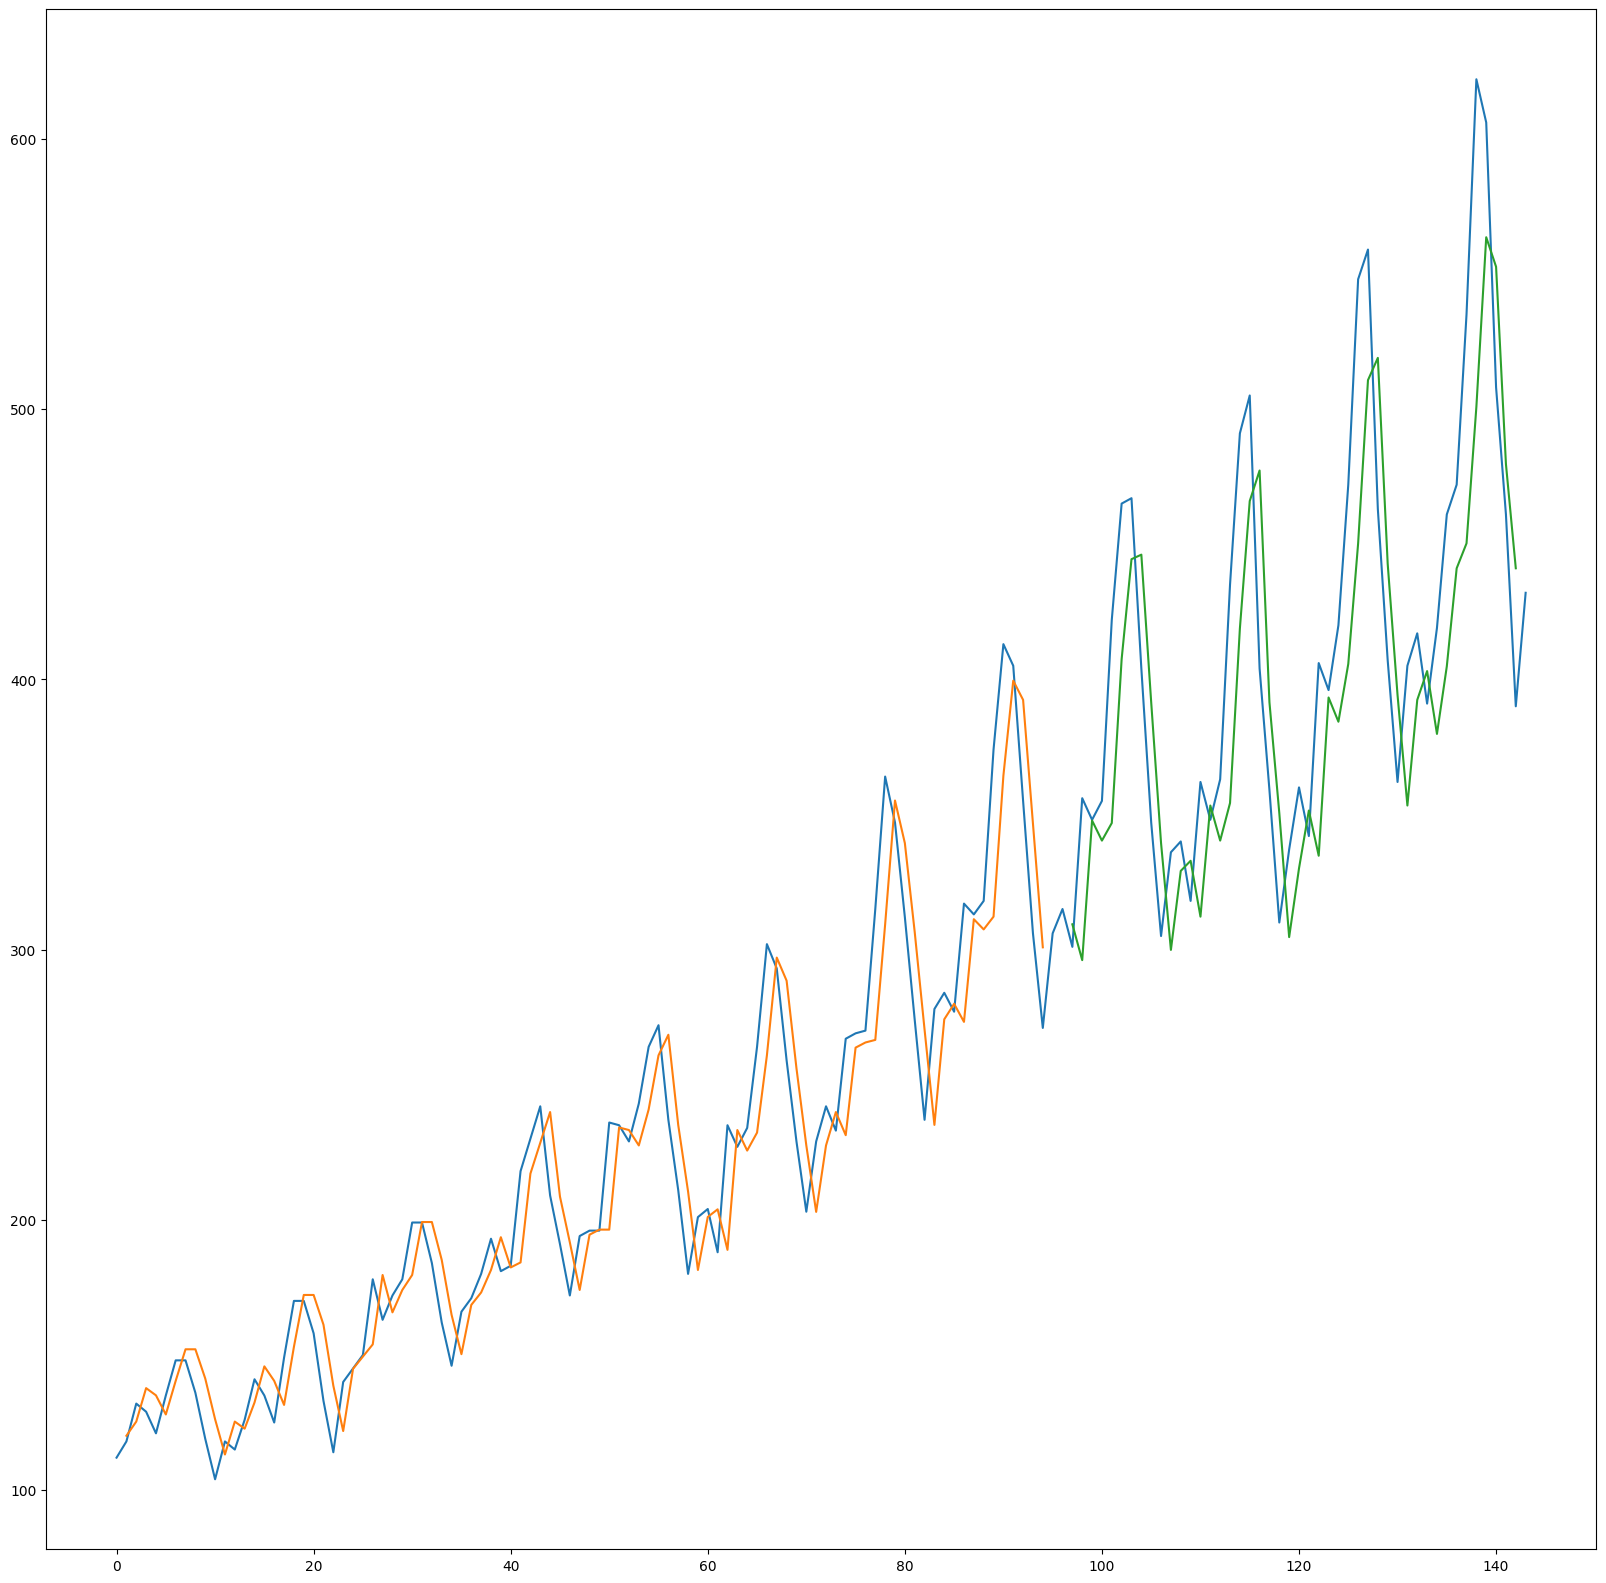

In [26]:
# plot baseline and predictions
plt.figure(figsize=(20,20))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()